# COURSE CAPSTONE PROJECT - THE BATTLE OF THE NEIGHBORHOODS

## BY CASPER WESSELINK

For this project my goal is to determine the best place of a Cheese Fondue restaurant in the city of Amsterdam. Cheese Fondue is pretty well known in The Netherlands, but there aren't that many places that actually serve it. I wan't to a start a business somewhere in Amterdam. Amsterdam is a vibrant city with many tourist and locals going out to dinner every night.

Because of the high amount of restaurants allready present in the city i will need a proper analysis of where i need to start my new business.

In order to make a good decision i have to find out which location will suit a Cheese Fondue the best. To do so i will aquire data from the following sources:

- Wikipedia
- data.amsterdam.nl (open source data)
- FourSquare

In this project i will use this data to acquire different datasets which i can use for my analyse. I will try and determine the following thing:

- Which boroughs are there in Amsterdam
- How many people live in these boroughs
- What are the coordinated of these boroughs
- What kind of restaurants are in each borough
- How many of same kind of restaurants are there in each borough
- Which boroughs have the lowest rate of Swiss, French and Ducth Cuisine
- Cluster the different neighborhoods to determine which Boroughs are more alike



In [2]:
#Installing extra geocoder
conda install -c conda-forge geocoder

Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         20

In [1]:
#Importing the required libraries. I allready installed most of the needed functions.
import requests
import wget
import geocoder
import math
import folium
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm  # Matplotlib and associated plotting modules
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from sklearn import metrics 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans # KMeans for clustering
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import json
import seaborn as sns
sns.set_style('darkgrid')

print("libabries imported")

libabries imported


In [2]:
url = 'https://en.wikipedia.org/wiki/Boroughs_of_Amsterdam'

In [3]:
table = pd.read_html(url)

# Boroughs
print(table[1])  # index 1 returns the 2nd table from the web page

                   Borough       Area  Population Population density  \
0         Centrum (Centre)   8.04 km²       86422         13,748/km²   
1            Noord (North)  49.01 km²       94766          2,269/km²   
2     Nieuw-West(New West)  32.38 km²      151677          4,478/km²   
3              Oost (East)  30.56 km²      135767          7,635/km²   
4                     West   9.89 km²      143842         15,252/km²   
5  Westpoort(West Gateway)     10 km²         192             10/km²   
6             Zuid (South)  17.41 km²      144432          9,349/km²   
7      Zuidoost(Southeast)  22.08 km²       87854          4,391/km²   

   Location (in green)                                     Neighbourhoods  
0                  NaN  Binnenstad, Grachtengordel, Haarlemmerbuurt, J...  
1                  NaN  Banne Buiksloot, Buiksloot, Buikslotermeer, Fl...  
2                  NaN  Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O...  
3                  NaN  IJburg, Indische Buurt,

In [4]:
# Create Borough data frame - bor_df
bor_df = pd.DataFrame(table[1])
print(bor_df)

                   Borough       Area  Population Population density  \
0         Centrum (Centre)   8.04 km²       86422         13,748/km²   
1            Noord (North)  49.01 km²       94766          2,269/km²   
2     Nieuw-West(New West)  32.38 km²      151677          4,478/km²   
3              Oost (East)  30.56 km²      135767          7,635/km²   
4                     West   9.89 km²      143842         15,252/km²   
5  Westpoort(West Gateway)     10 km²         192             10/km²   
6             Zuid (South)  17.41 km²      144432          9,349/km²   
7      Zuidoost(Southeast)  22.08 km²       87854          4,391/km²   

   Location (in green)                                     Neighbourhoods  
0                  NaN  Binnenstad, Grachtengordel, Haarlemmerbuurt, J...  
1                  NaN  Banne Buiksloot, Buiksloot, Buikslotermeer, Fl...  
2                  NaN  Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O...  
3                  NaN  IJburg, Indische Buurt,

In [5]:
# Dropping unnecessary columns, we keep only Boroughs and Population
bor_df = bor_df.drop(['Area', 'Population density', 'Location (in green)'],1)
bor_df.replace({'Centrum (Centre)':'Centrum', 'Noord (North)':'Noord', 'Nieuw-West(New West)':'Nieuw-West',
                    'Oost (East)':'Oost', 'Westpoort(West Gateway)':'Westpoort', 'Zuid (South)':'Zuid', 
                    'Zuidoost(Southeast)':'Zuidoost'}, inplace=True)

print(bor_df)
bor_df.to_csv('Boroughs.csv')

      Borough  Population                                     Neighbourhoods
0     Centrum       86422  Binnenstad, Grachtengordel, Haarlemmerbuurt, J...
1       Noord       94766  Banne Buiksloot, Buiksloot, Buikslotermeer, Fl...
2  Nieuw-West      151677  Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O...
3        Oost      135767  IJburg, Indische Buurt, Eastern Docklands, Oud...
4        West      143842  Frederik Hendrikbuurt, Houthaven, Spaarndammer...
5   Westpoort         192                                          Westpoort
6        Zuid      144432  Apollobuurt, Buitenveldert, Hoofddorppleinbuur...
7    Zuidoost       87854    Bijlmermeer, Venserpolder, Gaasperdam, Driemond


In [6]:
# Neighborhoods
print(table[3])  # index 3 returns the 4th table from the web page


                      vteNeighbourhoods of Amsterdam  \
0                                            Centrum   
1                                         Nieuw-West   
2                                              Noord   
3                                               Oost   
4                                               West   
5                                               Zuid   
6                                           Zuidoost   
7                                          Westpoort   
8  Former boroughs: De Baarsjes - Geuzenveld-Slot...   

                    vteNeighbourhoods of Amsterdam.1  \
0  Binnenstad (Oude Zijde - Nieuwe Zijde) Grachte...   
1  Geuzenveld (De Eendracht) Nieuw Sloten Oostoev...   
2  Banne Buiksloot Buiksloot Buikslotermeer Flora...   
3  IJburg (Haveneiland - Rieteilanden - Steigerei...   
4  Admiralenbuurt Bos en Lommer (Kolenkitbuurt - ...   
5  Apollobuurt Buitenveldert Hoofddorppleinbuurt ...   
6  Bijlmer Bullewijk Driemond Gaasperdam Holend

In [8]:
#Create Neighborhood data frame - ne_df
ne_df = pd.DataFrame(table[3])
print(ne_df)

                      vteNeighbourhoods of Amsterdam  \
0                                            Centrum   
1                                         Nieuw-West   
2                                              Noord   
3                                               Oost   
4                                               West   
5                                               Zuid   
6                                           Zuidoost   
7                                          Westpoort   
8  Former boroughs: De Baarsjes - Geuzenveld-Slot...   

                    vteNeighbourhoods of Amsterdam.1  \
0  Binnenstad (Oude Zijde - Nieuwe Zijde) Grachte...   
1  Geuzenveld (De Eendracht) Nieuw Sloten Oostoev...   
2  Banne Buiksloot Buiksloot Buikslotermeer Flora...   
3  IJburg (Haveneiland - Rieteilanden - Steigerei...   
4  Admiralenbuurt Bos en Lommer (Kolenkitbuurt - ...   
5  Apollobuurt Buitenveldert Hoofddorppleinbuurt ...   
6  Bijlmer Bullewijk Driemond Gaasperdam Holend

In [9]:
# Dropping unnecessary rows & columns and rename
ne_df = ne_df.drop(['vteNeighbourhoods of Amsterdam.2'],1)
ne_df = ne_df.drop(ne_df.index[8])
ne_df.rename(columns={'vteNeighbourhoods of Amsterdam.1':'Neighborhood',
                      'vteNeighbourhoods of Amsterdam':'Borough'}, inplace=True)

ne_df.to_csv('Neighborhoods.csv')
ne_df.head(10)

,Borough,Neighborhood
0,Centrum,Binnenstad (Oude Zijde - Nieuwe Zijde) Grachte...
1,Nieuw-West,Geuzenveld (De Eendracht) Nieuw Sloten Oostoev...
2,Noord,Banne Buiksloot Buiksloot Buikslotermeer Flora...
3,Oost,IJburg (Haveneiland - Rieteilanden - Steigerei...
4,West,Admiralenbuurt Bos en Lommer (Kolenkitbuurt - ...
5,Zuid,Apollobuurt Buitenveldert Hoofddorppleinbuurt ...
6,Zuidoost,Bijlmer Bullewijk Driemond Gaasperdam Holendre...
7,Westpoort,Teleport Westelijk Havengebied (Ruigoord)


In [10]:
# Merging the Borough and Neighborhood tables on "Borough" as new ams_df table containing Boroughs, Neighborhood and Population
ams_df = pd.merge(bor_df, ne_df, on='Borough')

In [11]:
print(ams_df)
ams_df.to_csv('amsterdam_loc.csv', index=False)

      Borough  Population                                     Neighbourhoods  \
0     Centrum       86422  Binnenstad, Grachtengordel, Haarlemmerbuurt, J...   
1       Noord       94766  Banne Buiksloot, Buiksloot, Buikslotermeer, Fl...   
2  Nieuw-West      151677  Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O...   
3        Oost      135767  IJburg, Indische Buurt, Eastern Docklands, Oud...   
4        West      143842  Frederik Hendrikbuurt, Houthaven, Spaarndammer...   
5   Westpoort         192                                          Westpoort   
6        Zuid      144432  Apollobuurt, Buitenveldert, Hoofddorppleinbuur...   
7    Zuidoost       87854    Bijlmermeer, Venserpolder, Gaasperdam, Driemond   

                                        Neighborhood  
0  Binnenstad (Oude Zijde - Nieuwe Zijde) Grachte...  
1  Banne Buiksloot Buiksloot Buikslotermeer Flora...  
2  Geuzenveld (De Eendracht) Nieuw Sloten Oostoev...  
3  IJburg (Haveneiland - Rieteilanden - Steigerei...  
4  A

In [12]:
# Drop neighborhood from ams_df
ams_df = ams_df.drop(['Neighborhood'], 1)
ams_df = ams_df.drop(ams_df.index[5])  # removing row index 5

In [14]:
import os

print("Libraries imported")

Libraries imported


In [48]:
df = pd.read_csv('/Users/casperwesselink/Desktop/amsdata_df.csv', delimiter=';')
amsdata_df = df                
df

,Borough,Population,Latitude,Longitude
0,Centrum,86422,52.369985,4.898014
1,Noord,94766,52.391111,4.918306
2,Nieuw-West,151677,52.363742,4.806862
3,Oost,135767,52.352778,4.930556
4,West,143842,52.383025,4.852867
5,Zuid,144432,52.346389,4.858611
6,Zuidoost,87854,52.310556,4.973333


In [45]:
conda install -c conda-forge folium

Solving environment: \ 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
# @hidden_cell
CLIENT_ID = 'X1JRGF1H141MBDDAYMXM5FFQW1U4MWAIEPBVQACYLJCJYESK' # Foursquare ID
CLIENT_SECRET = 'GA4NUG4YXLMNP1STGT4C4JBHL2XTRQOFL1AL2URIPOIEP3QM' # Foursquare Secret
VERSION = '20180605'

In [66]:
address = 'Amsterdam, NL'

geolocator = Nominatim(user_agent="Foursquare_agent")
location = geolocator.geocode(address)
ams_latitude = location.latitude
ams_longitude = location.longitude
print('Amsterdam Geographical coordinates are Lat={}, Lng={} '.format(ams_latitude, ams_longitude))

Amsterdam Geographical coordinates are Lat=52.3727598, Lng=4.8936041 


In [67]:
amsterdam_map = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=11, control_scale = True)

for lat, lng, Borough in zip(amsdata_df['Latitude'], amsdata_df['Longitude'], amsdata_df['Borough']):
    tag = '{}'.format(Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(amsterdam_map)

# adding a folium feature allowing location [Neighborhood, Borough], and coordinates shown with mouse-over and 
# mouse click on the map 
amsterdam_map.add_child(folium.LatLngPopup())
    
amsterdam_map

In [72]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=X1JRGF1H141MBDDAYMXM5FFQW1U4MWAIEPBVQACYLJCJYESK{}&client_secret=GA4NUG4YXLMNP1STGT4C4JBHL2XTRQOFL1AL2URIPOIEP3QM{}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    location.latitude, 
    location.longitude, 
    radius, 
    LIMIT)


In [81]:
def getNearbyVenues (names, latitude, longitude, radius=2000, limit=1000, query='Restaurant'):
    
    venue_lst=[] # initialize empty list
    
    for name, lat, lng in zip (names, latitude, longitude):
        print(name)
        
    
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            query)
        
        # Get request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                
        # return only relevant information for each nearby venue in the preliminary list
        venue_lst.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venue_df = pd.DataFrame([item for venue_lst in venue_lst for item in venue_lst])
    venue_df.columns = ['Borough', 
                  'Borough Lat', 
                  'Borough Lng', 
                  'Venue', 
                  'Venue Lat', 
                  'Venue Lng', 
                  'Venue Category']

    print('{} venues were returned by Foursquare.'.format(venue_df.shape[0]))
    
    return (venue_df)

In [82]:
amsterdam_venues_df = getNearbyVenues (names=amsdata_df['Borough'], 
                                     latitude=amsdata_df['Latitude'], 
                                     longitude=amsdata_df['Longitude'])

Centrum
Noord
Nieuw-West
Oost
West
Zuid
Zuidoost
625 venues were returned by Foursquare.


# So there are 625 restaurants or similar places in the area

In [75]:
# checking amsterdam_venues dataframe size and summary content
print(amsterdam_venues_df.shape)
amsterdam_venues_df.head(10)

(625, 7)


,Borough,Borough Lat,Borough Lng,Venue,Venue Lat,Venue Lng,Venue Category
0,Centrum,52.369985,4.898014,"""Krua Thai"" Classic",52.368207,4.898012,Thai Restaurant
1,Centrum,52.369985,4.898014,The Lobby,52.371159,4.893661,Restaurant
2,Centrum,52.369985,4.898014,De Laatste Kruimel,52.369220,4.892810,Bakery
3,Centrum,52.369985,4.898014,Puccini Espressobar,52.368126,4.898638,Italian Restaurant
4,Centrum,52.369985,4.898014,Café van Kerkwijk,52.371494,4.893658,Restaurant
5,Centrum,52.369985,4.898014,Gartine,52.369157,4.891615,Breakfast Spot
6,Centrum,52.369985,4.898014,Cafe Droog,52.368375,4.897672,Café
7,Centrum,52.369985,4.898014,Bridges Restaurant,52.370818,4.895087,Seafood Restaurant
8,Centrum,52.369985,4.898014,Pho King,52.366789,4.894902,Vietnamese Restaurant
9,Centrum,52.369985,4.898014,Wok to Walk,52.371773,4.896363,Asian Restaurant


In [76]:
# Optional: Saving amsterdam_venues_df
amsterdam_venues_df.to_csv('amsterdam_venues.csv', index=False)

In [78]:
print('There are {} different types of restaurants in the Amsterdam area.'.format(len(amsterdam_venues_df['Venue Category'].unique())))

There are 76 different types of restaurants in the Amsterdam area.


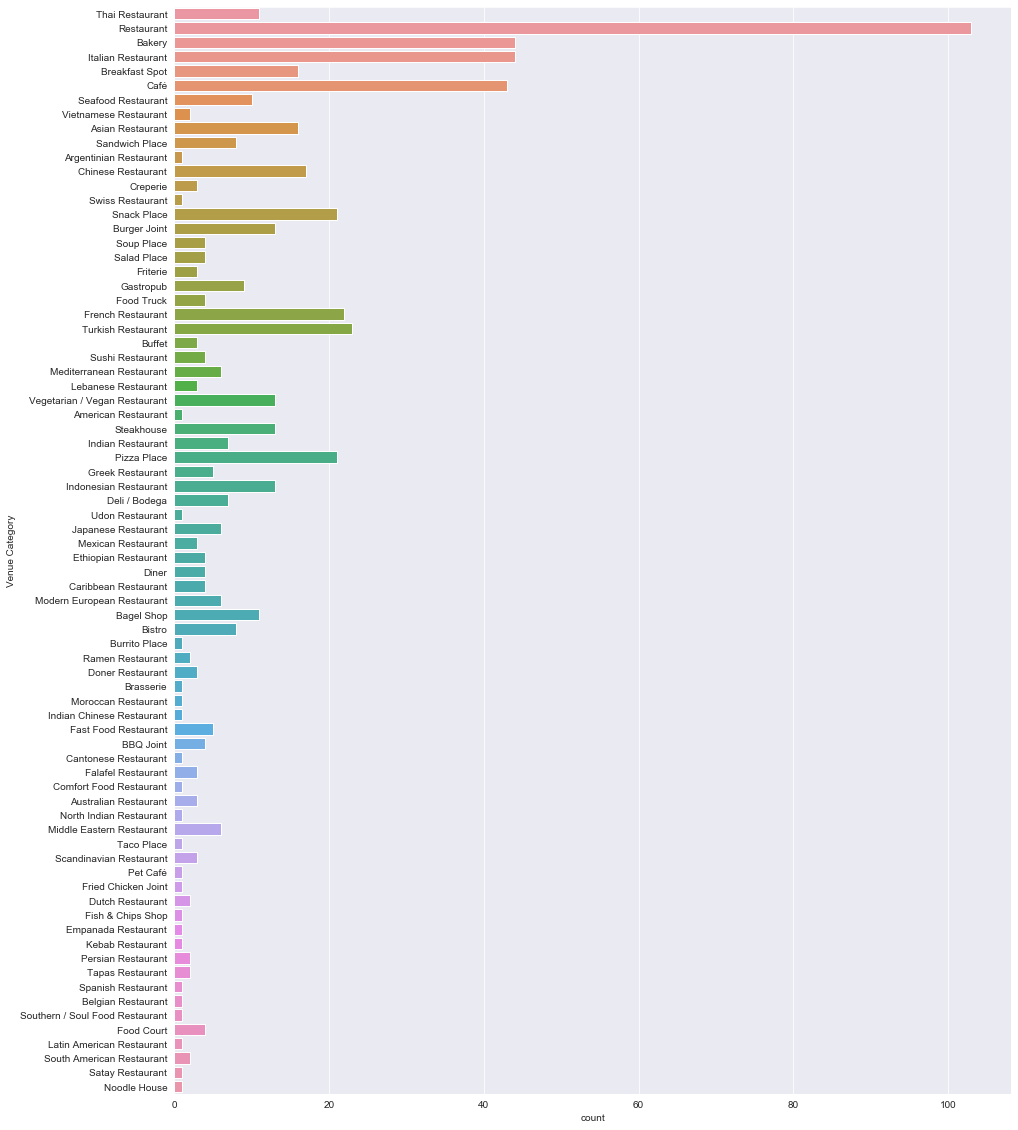

In [79]:
# Class distributions for 'Venue Category'

plt.figure(figsize=(15,20))
sns.countplot (y='Venue Category', data=amsterdam_venues_df)

plt.show()

### Checking how many restaurants are in each borough

In [83]:
amsterdam_venues_df.groupby('Borough').count()

,Borough Lat,Borough Lng,Venue,Venue Lat,Venue Lng,Venue Category
Borough,,,,,,
Centrum,100,100,100,100,100,100
Nieuw-West,57,57,57,57,57,57
Noord,95,95,95,95,95,95
Oost,100,100,100,100,100,100
West,100,100,100,100,100,100
Zuid,100,100,100,100,100,100
Zuidoost,73,73,73,73,73,73


In [84]:
# groupby 'Borough' and 'Venue Category' .size()
amsterdam_venues_df.groupby(['Borough','Venue Category']).size()

Borough     Venue Category                 
Centrum     American Restaurant                 1
            Argentinian Restaurant              1
            Asian Restaurant                    2
            Bakery                              5
            Breakfast Spot                      6
            Buffet                              1
            Burger Joint                        5
            Café                               10
            Chinese Restaurant                  2
            Creperie                            2
            Deli / Bodega                       1
            Food Truck                          1
            French Restaurant                   7
            Friterie                            1
            Gastropub                           2
            Greek Restaurant                    1
            Indian Restaurant                   1
            Indonesian Restaurant               2
            Italian Restaurant                  7
      

## We will only keep restaurants in the dataframe and remove all other venues

This because our Cheese Fondue is not associated with these others venues and will compete with restaurants. 

In [85]:
amsterdam_rest_df = amsterdam_venues_df[amsterdam_venues_df['Venue Category'].str.contains('Restaurant')]

In [86]:
# checking amsterdam_rest dataframe size and summary content
print(amsterdam_rest_df.shape)
amsterdam_rest_df.head(10)

(371, 7)


,Borough,Borough Lat,Borough Lng,Venue,Venue Lat,Venue Lng,Venue Category
0,Centrum,52.369985,4.898014,"""Krua Thai"" Classic",52.368207,4.898012,Thai Restaurant
1,Centrum,52.369985,4.898014,The Lobby,52.371159,4.893661,Restaurant
3,Centrum,52.369985,4.898014,Puccini Espressobar,52.368126,4.898638,Italian Restaurant
4,Centrum,52.369985,4.898014,Café van Kerkwijk,52.371494,4.893658,Restaurant
7,Centrum,52.369985,4.898014,Bridges Restaurant,52.370818,4.895087,Seafood Restaurant
8,Centrum,52.369985,4.898014,Pho King,52.366789,4.894902,Vietnamese Restaurant
9,Centrum,52.369985,4.898014,Wok to Walk,52.371773,4.896363,Asian Restaurant
11,Centrum,52.369985,4.898014,Bhatti Pasal,52.368055,4.890838,Restaurant
12,Centrum,52.369985,4.898014,Guts and Glory,52.365728,4.897594,Restaurant
14,Centrum,52.369985,4.898014,The Seafood Bar,52.368730,4.890600,Seafood Restaurant


In [87]:
# Optional: Saving amsterdam_rest_df
amsterdam_rest_df.to_csv('amsterdam_rest.csv', index=False)

In [88]:
amsterdam_rest_map = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=12, control_scale = True)

# Toronto map markers (tag's)
for lat, lng, Borough, venue in zip(amsterdam_rest_df['Venue Lat'], amsterdam_rest_df['Venue Lng'], amsterdam_rest_df['Borough'], amsterdam_rest_df['Venue']):
    tag = '{}'.format(Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(amsterdam_rest_map)

# adding a folium feature allowing location, and coordinates shown with mouse-over and 
# mouse click on the map 
amsterdam_rest_map.add_child(folium.LatLngPopup())
    
amsterdam_rest_map

In [89]:
#Checking how many restaurants remain in each borough
amsterdam_rest_df.groupby('Borough').count()

,Borough Lat,Borough Lng,Venue,Venue Lat,Venue Lng,Venue Category
Borough,,,,,,
Centrum,51,51,51,51,51,51
Nieuw-West,35,35,35,35,35,35
Noord,48,48,48,48,48,48
Oost,67,67,67,67,67,67
West,69,69,69,69,69,69
Zuid,58,58,58,58,58,58
Zuidoost,43,43,43,43,43,43


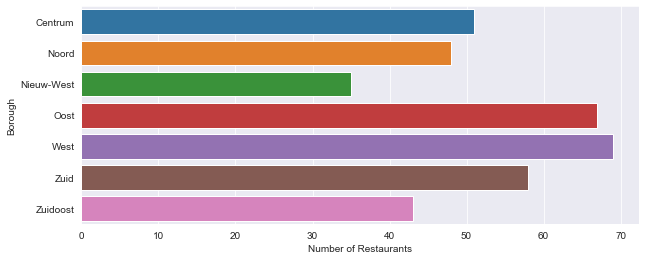

In [91]:
# Visualisation for each of the boroughs
plt.figure(figsize=(10,4))
sns.countplot (y='Borough', data=amsterdam_rest_df)
plt.xlabel('Number of Restaurants')

plt.show()

# Visualizing the amount of restaurants in each of the boroughs 

this is to get a clear picture of wat kind of restaurants are in each borough and how many of them there are


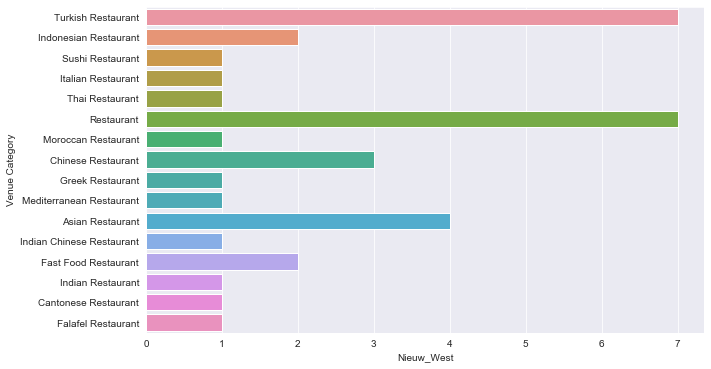

In [92]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Nieuw-West')])
plt.xlabel('Nieuw_West')
plt.show()

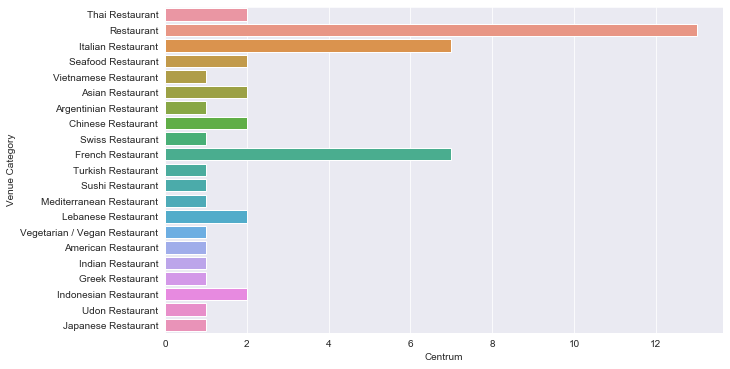

In [94]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Centrum')])
plt.xlabel('Centrum')
plt.show()

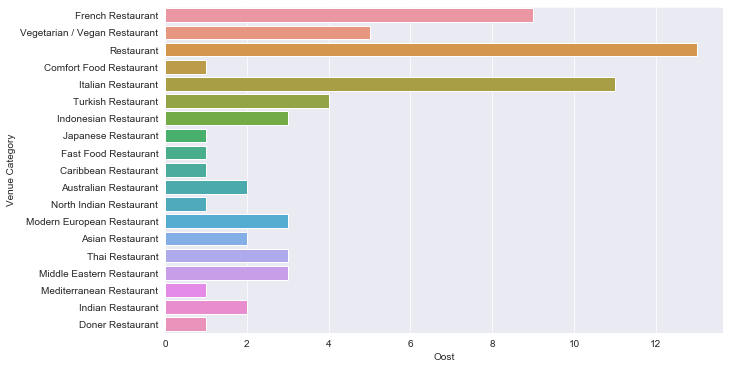

In [95]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Oost')])
plt.xlabel('Oost')
plt.show()

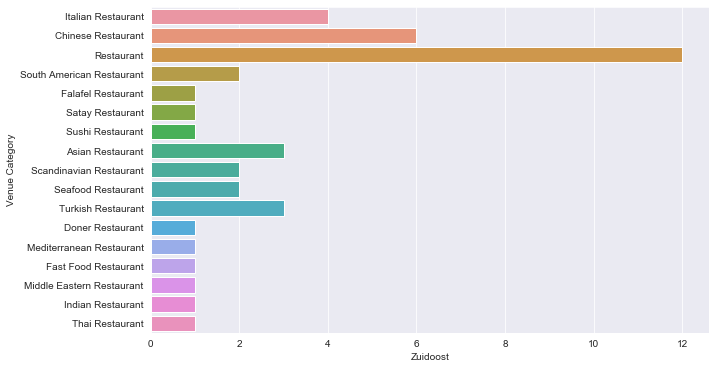

In [96]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Zuidoost')])
plt.xlabel('Zuidoost')
plt.show()

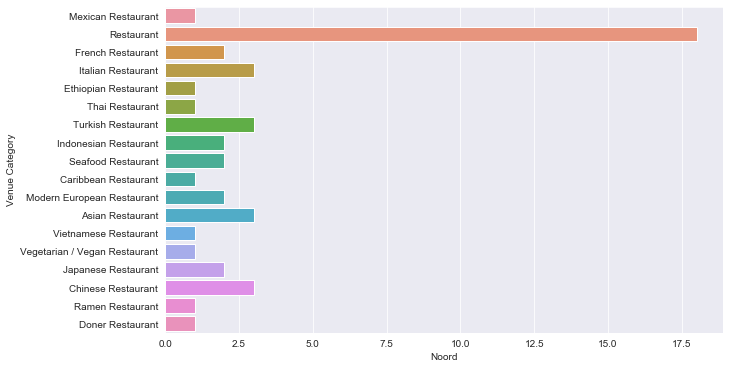

In [97]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Noord')])
plt.xlabel('Noord')
plt.show()

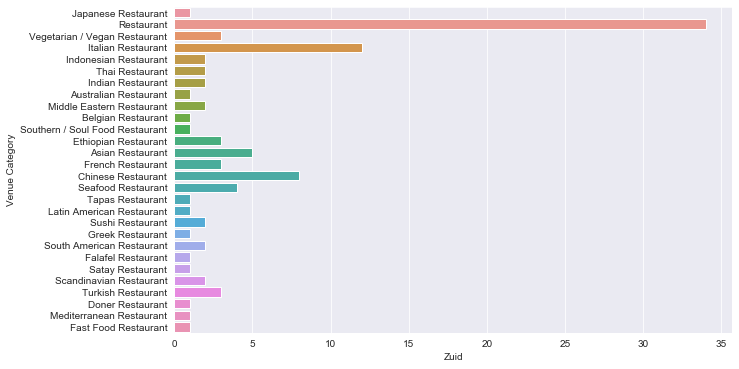

In [98]:
# Overall Class distribution for 'Venue Category' for Nieuw-West Borough

plt.figure(figsize=(10,6))
sns.countplot (y='Venue Category', data=amsterdam_rest_df[amsterdam_rest_df['Borough'].str.contains('Zuid')])
plt.xlabel('Zuid')
plt.show()

# Preparing the cells for analysis

In [99]:
# one hot encoding of the Venue Category
amsterdam_onehot = pd.get_dummies(amsterdam_rest_df[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
amsterdam_onehot['Borough'] = amsterdam_rest_df['Borough'] 

# move borough column to the first column
fixed_columns = [amsterdam_onehot.columns[-1]] + list(amsterdam_onehot.columns[:-1])
amsterdam_onehot = amsterdam_onehot[fixed_columns]

amsterdam_onehot.head()

,Borough,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,North Indian Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Centrum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Centrum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centrum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centrum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Centrum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Number of venues encoded
print('{} venues encoded.'.format(amsterdam_onehot.shape[0]-1))
# Shape of encoded dataframe
print('Shape amsterdam_onehot:', amsterdam_onehot.shape)

370 venues encoded.
Shape amsterdam_onehot: (371, 49)


In [101]:
# Optional - save the encoded df
amsterdam_onehot.to_csv('amsterdam_onehot.csv', index=False)

In [118]:
amsterdam_grouped = amsterdam_onehot.groupby('Borough').mean().reset_index()

# Display the grouped dataframe
amsterdam_grouped

,Borough,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,North Indian Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Centrum,0.019608,0.019608,0.039216,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137255,0.019608,0.000000,0.019608,0.039216,0.137255,0.019608,0.000000,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254902,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.039216,0.019608,0.019608,0.019608,0.019608
1,Nieuw-West,0.000000,0.000000,0.114286,0.000000,0.000000,0.028571,0.000000,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.057143,0.000000,0.028571,0.028571,0.028571,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.200000,0.000000,0.000000,0.000000
2,Noord,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.062500,0.041667,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.041667,0.000000,0.000000,0.000000,0.020833,0.375000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.020833
3,Oost,0.000000,0.000000,0.029851,0.029851,0.000000,0.000000,0.014925,0.000000,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.134328,0.000000,0.000000,0.029851,0.044776,0.164179,0.014925,0.000000,0.000000,0.000000,0.014925,0.000000,0.044776,0.044776,0.000000,0.014925,0.000000,0.000000,0.194030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044776,0.059701,0.000000,0.074627,0.000000
4,West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.014493,0.000000,0.000000,0.028986,0.014493,0.000000,0.014493,0.014493,0.014493,0.028986,0.000000,0.014493,0.028986,0.144928,0.014493,0.014493,0.000000,0.014493,0.028986,0.028986,0.014493,0.014493,0.000000,0.000000,0.028986,0.014493,0.260870,0.000000,0.014493,0.028986,0.000000,0.000000,0.014493,0.000000,0.000000,0.014493,0.028986,0.072464,0.000000,0.043478,0.000000
5,Zuid,0.000000,0.000000,0.034483,0.017241,0.017241,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.051724,0.017241,0.000000,0.017241,0.034483,0.137931,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.379310,0.000000,0.000000,0.034483,0.000000,0.017241,0.000000,0.017241,0.000000,0.017241,0.017241,0.000000,0.000000,0.051724,0.000000
6,Zuidoost,0.000000,0.000000,0.069767,0.000000,0.000000,0.000000,0.000000,0.139535,0.000000,0.023256,0.000000,0.000000,0.000000,0.023256,0.023256,0.000000,0.000000,0.000000,0.023256,0.000000,0.093023,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.279070,0.023256,0.046512,0.046512,0.046512,0.000000,0.

## The main competion is in the French, Swiss and Dutch Restaurant because they have the highest posibillity to sell Cheese Fondue. So below i have narrowed it down to these three kinds of restaurants.

In [122]:
amsterdam_grouped = amsterdam_onehot.groupby('Borough').mean().reset_index()
amsterdam_grouped = amsterdam_grouped[['Borough', 'French Restaurant','Swiss Restaurant','Dutch Restaurant']]
# Display the grouped dataframe
amsterdam_grouped

,Borough,French Restaurant,Swiss Restaurant,Dutch Restaurant
0,Centrum,0.137255,0.019608,0.000000
1,Nieuw-West,0.000000,0.000000,0.000000
2,Noord,0.041667,0.000000,0.000000
3,Oost,0.134328,0.000000,0.000000
4,West,0.014493,0.000000,0.028986
5,Zuid,0.051724,0.000000,0.000000
6,Zuidoost,0.000000,0.000000,0.000000


# Getting the frequency of each restaurant in each borough

In [103]:
amsterdam_grouped.groupby(['Borough','Restaurant']).sum()

,,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,North Indian Restaurant,Persian Restaurant,Ramen Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Borough,Restaurant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centrum,0.254902,0.019608,0.019608,0.039216,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137255,0.019608,0.000000,0.019608,0.039216,0.137255,0.019608,0.000000,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.039216,0.019608,0.019608,0.019608,0.019608
Nieuw-West,0.200000,0.000000,0.000000,0.114286,0.000000,0.000000,0.028571,0.000000,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.057143,0.000000,0.028571,0.028571,0.028571,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.200000,0.000000,0.000000,0.000000
Noord,0.375000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.062500,0.041667,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.041667,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.020833
Oost,0.194030,0.000000,0.000000,0.029851,0.029851,0.000000,0.000000,0.014925,0.000000,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.134328,0.000000,0.000000,0.029851,0.044776,0.164179,0.014925,0.000000,0.000000,0.000000,0.014925,0.000000,0.044776,0.044776,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044776,0.059701,0.000000,0.074627,0.000000
West,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.014493,0.000000,0.000000,0.028986,0.014493,0.000000,0.014493,0.014493,0.014493,0.028986,0.000000,0.014493,0.028986,0.144928,0.014493,0.014493,0.000000,0.014493,0.028986,0.028986,0.014493,0.014493,0.000000,0.000000,0.028986,0.014493,0.000000,0.014493,0.028986,0.000000,0.000000,0.014493,0.000000,0.000000,0.014493,0.028986,0.072464,0.000000,0.043478,0.000000
Zuid,0.379310,0.000000,0.000000,0.034483,0.017241,0.017241,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.051724,0.017241,0.000000,0.017241,0.034483,0.137931,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.017241,0.000000,0.017241,0.000000,0.017241,0.017241,0.000000,0.000000,0.051724,0.000000
Zuidoost,0.279070,0.000000,0.000000,0.069767,0.000000,0.000000,0.000000,0.000000,0.139535,0.000000,0.023256,0.000000,0.000000,0.000000,0.023256,0.023256,0.000000,0.000000,0.000000,0.023256,0.000000,0.093023,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.04

In [104]:
amsterdam_grouped.shape

(7, 49)

In [105]:
# Optional - save amsterdam_grouped dataframe
amsterdam_grouped.to_csv('amsterdam_grouped.csv', index=False)

# Finding the top 10 locations of each restaurant in the different boroughs

Cheese Fondue is mostly associated with the French, Swiss and Dutch Kitchen. Although this doesn't mean that the French, Swiss and Dutch restaurant actually serve Cheese Fondue. It is pretty rare. 

In [106]:
num_top_venues = 10

for place in amsterdam_grouped['Borough']:
    print("----"+place+"----")
    temp = amsterdam_grouped[amsterdam_grouped['Borough'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    # print(temp)
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Centrum----
                   venue  freq
0             Restaurant  0.25
1     Italian Restaurant  0.14
2      French Restaurant  0.14
3    Lebanese Restaurant  0.04
4     Chinese Restaurant  0.04
5     Seafood Restaurant  0.04
6  Indonesian Restaurant  0.04
7        Thai Restaurant  0.04
8       Asian Restaurant  0.04
9       Swiss Restaurant  0.02


----Nieuw-West----
                       venue  freq
0         Turkish Restaurant  0.20
1                 Restaurant  0.20
2           Asian Restaurant  0.11
3         Chinese Restaurant  0.09
4      Indonesian Restaurant  0.06
5       Fast Food Restaurant  0.06
6        Moroccan Restaurant  0.03
7         Falafel Restaurant  0.03
8          Indian Restaurant  0.03
9  Indian Chinese Restaurant  0.03


----Noord----
                        venue  freq
0                  Restaurant  0.38
1            Asian Restaurant  0.06
2          Turkish Restaurant  0.06
3          Chinese Restaurant  0.06
4          Italian Restaurant  0.06
5  Mo

In [107]:
#Sorting the venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [108]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = amsterdam_grouped['Borough']

for ind in np.arange(amsterdam_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(amsterdam_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centrum,Restaurant,French Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,Indonesian Restaurant,Seafood Restaurant,Lebanese Restaurant,Vietnamese Restaurant
1,Nieuw-West,Turkish Restaurant,Restaurant,Asian Restaurant,Chinese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Italian Restaurant,Mediterranean Restaurant,Greek Restaurant
2,Noord,Restaurant,Chinese Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Japanese Restaurant,French Restaurant,Modern European Restaurant,Seafood Restaurant,Indonesian Restaurant
3,Oost,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Indonesian Restaurant,Thai Restaurant,Indian Restaurant
4,West,Restaurant,Italian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mediterranean Restaurant,Mexican Restaurant,Persian Restaurant,Caribbean Restaurant,Dutch Restaurant
5,Zuid,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Ethiopian Restaurant,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Seafood Restaurant,Latin American Restaurant
6,Zuidoost,Restaurant,Chinese Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,South American Restaurant,Scandinavian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Doner Restaurant


In [109]:
# Optional - saving borough_venues_sorted df
boroughs_venues_sorted.to_csv('boroughs_venues_sorted.csv', index=False)

# Making Clusters of the venue locations

In [111]:
# preparing the data for clustering - dropping the Borough column as it is not required
amsterdam_grouped_clustering = amsterdam_grouped.drop('Borough', 1)
amsterdam_grouped_clustering

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,North Indian Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.019608,0.019608,0.039216,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137255,0.019608,0.000000,0.019608,0.039216,0.137255,0.019608,0.000000,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254902,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.039216,0.019608,0.019608,0.019608,0.019608
1,0.000000,0.000000,0.114286,0.000000,0.000000,0.028571,0.000000,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.057143,0.000000,0.028571,0.028571,0.028571,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.200000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.062500,0.041667,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.041667,0.000000,0.000000,0.000000,0.020833,0.375000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.062500,0.000000,0.020833,0.020833
3,0.000000,0.000000,0.029851,0.029851,0.000000,0.000000,0.014925,0.000000,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.134328,0.000000,0.000000,0.029851,0.044776,0.164179,0.014925,0.000000,0.000000,0.000000,0.014925,0.000000,0.044776,0.044776,0.000000,0.014925,0.000000,0.000000,0.194030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044776,0.059701,0.000000,0.074627,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.014493,0.000000,0.000000,0.028986,0.014493,0.000000,0.014493,0.014493,0.014493,0.028986,0.000000,0.014493,0.028986,0.144928,0.014493,0.014493,0.000000,0.014493,0.028986,0.028986,0.014493,0.014493,0.000000,0.000000,0.028986,0.014493,0.260870,0.000000,0.014493,0.028986,0.000000,0.000000,0.014493,0.000000,0.000000,0.014493,0.028986,0.072464,0.000000,0.043478,0.000000
5,0.000000,0.000000,0.034483,0.017241,0.017241,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.051724,0.000000,0.000000,0.051724,0.017241,0.000000,0.017241,0.034483,0.137931,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.379310,0.000000,0.000000,0.034483,0.000000,0.017241,0.000000,0.017241,0.000000,0.017241,0.017241,0.000000,0.000000,0.051724,0.000000
6,0.000000,0.000000,0.069767,0.000000,0.000000,0.000000,0.000000,0.139535,0.000000,0.023256,0.000000,0.000000,0.000000,0.023256,0.023256,0.000000,0.000000,0.000000,0.023256,0.000000,0.093023,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.279070,0.023256,0.046512,0.046512,0.046512,0.000000,0.000000,0.023256,0.000000,0.000000,0.023256,0.069767,0.000

In [112]:
# Identify optiomal k using inertia. 
# We test range 1 to K clusters

inertias = [] 
mapping = {} 
K = range(1,7) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, n_init=50, max_iter=600, tol=0.0001, random_state=0)
    kmeanModel.fit(amsterdam_grouped_clustering)

    inertias.append(kmeanModel.inertia_) 

    # Inertia
    mapping[k] = kmeanModel.inertia_

In [113]:
for key,val in mapping.items(): 
    print(str(key)+' : '+str(val))

1 : 0.15620230850700106
2 : 0.09918541490943894
3 : 0.062105671693213176
4 : 0.03828702810307128
5 : 0.021589982698540067
6 : 0.010244294160391066


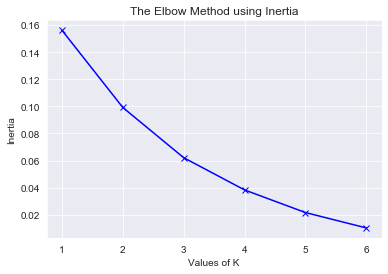

In [114]:
# plt.figure(figsize=(20,10))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# You can see that there is slight bent where K = 3. We go further with K = 3

In [126]:
# set the number of clusters
kclusters = 3

# amsterdam_grouped_clustering = amsterdam_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, n_init=50, max_iter=600, tol=0.0001, random_state=0)

kmeans.fit(amsterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 1, 2, 0, 0, 2, 2], dtype=int32)

In [137]:
# add clustering labels
amsterdam_merged = amsdata_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
amsterdam_merged = amsterdam_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')
amsterdam_merged.drop(columns=['Cluster_Labels', 'Cluster_Labels1', 'Cluster_Labels2', 'Cluster_Labels3', 'Cluster_Labels4'])
amsterdam_merged

,Borough,Population,Latitude,Longitude,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,Cluster_Labels2,Cluster_Labels1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centrum,86422,52.369985,4.898014,0,0,0,0,0,0,Restaurant,French Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,Indonesian Restaurant,Seafood Restaurant,Lebanese Restaurant,Vietnamese Restaurant
1,Noord,94766,52.391111,4.918306,2,2,2,2,2,2,Restaurant,Chinese Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Japanese Restaurant,French Restaurant,Modern European Restaurant,Seafood Restaurant,Indonesian Restaurant
2,Nieuw-West,151677,52.363742,4.806862,1,1,1,1,1,1,Turkish Restaurant,Restaurant,Asian Restaurant,Chinese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Italian Restaurant,Mediterranean Restaurant,Greek Restaurant
3,Oost,135767,52.352778,4.930556,0,0,0,0,0,0,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Indonesian Restaurant,Thai Restaurant,Indian Restaurant
4,West,143842,52.383025,4.852867,0,0,0,0,0,0,Restaurant,Italian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mediterranean Restaurant,Mexican Restaurant,Persian Restaurant,Caribbean Restaurant,Dutch Restaurant
5,Zuid,144432,52.346389,4.858611,2,2,2,2,2,2,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Ethiopian Restaurant,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Seafood Restaurant,Latin American Restaurant
6,Zuidoost,87854,52.310556,4.973333,2,2,2,2,2,2,Restaurant,Chinese Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,South American Restaurant,Scandinavian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Doner Restaurant


In [117]:
# create map
map_clusters = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(amsterdam_merged['Latitude'], amsterdam_merged['Longitude'], amsterdam_merged['Borough'], amsterdam_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

for lat, lng, Borough, venue in zip(amsterdam_rest_df['Venue Lat'], amsterdam_rest_df['Venue Lng'], amsterdam_rest_df['Borough'], amsterdam_rest_df['Venue']):
    tag = '{}'.format(Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=0.5,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)
       
map_clusters

# Conclusion on this analysis

### Goal

The goal of this analysis was to determine a good place for me to start a Cheese Fondue restaurant in the City of Amterdam.  

### Proces

####Data

I have used serveral pieces of data. I scraped wikipedia for the boroughs and used some data from data.amsterdam.nl for aquiring the coordinates. I also used the data from Foursquare to get a clear picture of the types of Restaurant that are in the area. 

####Methods

During this analysis i have used several methods to determine where i should start my cheese fondue restaurant. I scraped Wikipedia to get some information on the different boroughs in the area. Then is used the data from data.amsterdam.nl in addition to the data from Wikipedia and merged those two datasets.

After this i used the dataset along with FourSquare to determine which restaurant and venues were in the different boroughs. After analysing this data i reduced the data because there were several venues that were unneeded in the dataset. After removing i visualed the amount of different restaurants in each borough. This gave a clear picture of the amount of restaurants and what kind of kitchen they have. 

Futhermore, i have then clustered the different borough based on the Foursquare, Wikipedia and data.amsterdam data. This reveiled a total of 3 clusters.


### Findings

Out of internetresearch i determined that Cheese Fondue is most associated with the FRENCH, SWISS and DUCTH Kitchen. So that will be the three kitchens were i am going to look at.

- West, Zuid, Oost and Nieuw have the most occupants in their boroughs. 
- West Noord and Zuid have the lowest rate of Swiss, French and Dutch Restaurants
- Noord and Zuid are in the same cluster
- West is in the same cluster as Oost en Centrum so would be less suitable.

Although the clusters are not perfect you can determine that one cluster is a little bit different from another cluster. Noord and Zuid are both in same the cluster and share the least amount of FRENCH, DUTCH and SWISS restaurant, so i will place business somewhere in these neighbourhoods



### Additional Research

For an even better analysis i would do extra research in the menu's of the Swiss, French and Dutch Restaurant to see if they actually sell Cheese Fondue. 

Also i would do additional research on customer behaviour. How many percentages of the inhabitant go out to dinner in each borough and where do they go. 

I believe these 2 factors would be a great addition to my research te perfectly determine the best place for me to start a Cheese Fondue restaurant.



